# Contour Plots in Matplotlib

## Overview
Contour plots visualize a 3D surface \(z=f(x,y)\) on a 2D plane using **lines** (`contour`) or **filled regions** (`contourf`).

### What you'll learn
- Create contour and filled contour plots
- Choose levels and colormaps
- Add colorbars and contour labels
- Handle irregular grids (triangulation)
- Combine contour with heatmaps and 3D projections
- Best practices for interpretability


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

%matplotlib inline
np.random.seed(42)
print('✅ Setup complete (contours ready).')

✅ Setup complete (contours ready).


## 1. Contour Basics

### Create a grid
Most contour plots start with a meshgrid:

```python
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)
```

### contour vs contourf
```python
cs = ax.contour(X, Y, Z, levels=12, cmap='coolwarm')
cf = ax.contourf(X, Y, Z, levels=12, cmap='coolwarm')
plt.colorbar(cf, ax=ax)
ax.clabel(cs, inline=True, fontsize=9)
```
### Picking levels
- Fewer levels (8–12): cleaner, faster.
- More levels (20–50): smoother gradients, potentially noisy.
- Use explicit levels for consistent comparisons across plots.


=== CONTOUR vs CONTOURF ===


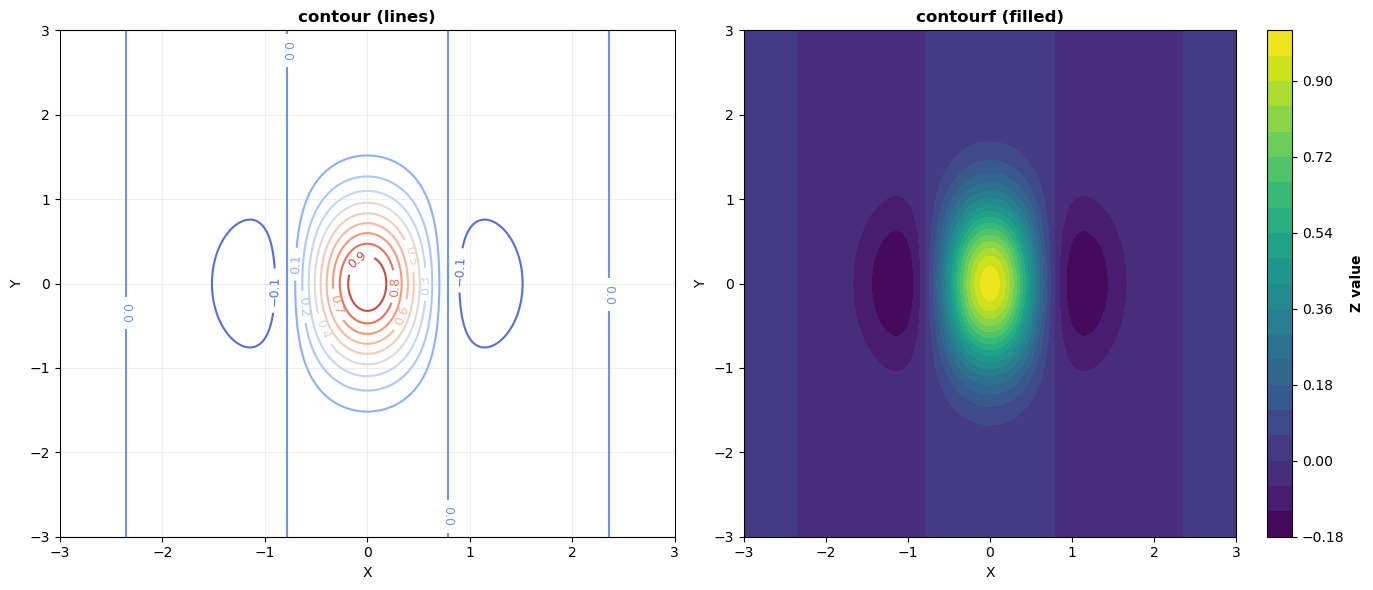

In [2]:
print('=== CONTOUR vs CONTOURF ===')
x = np.linspace(-3, 3, 250)
y = np.linspace(-3, 3, 250)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2)) * np.cos(2*X)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

cs = axes[0].contour(X, Y, Z, levels=12, cmap='coolwarm')
axes[0].clabel(cs, inline=True, fontsize=9)
axes[0].set_title('contour (lines)', fontweight='bold')
axes[0].set_xlabel('X'); axes[0].set_ylabel('Y')
axes[0].grid(True, alpha=0.2)

cf = axes[1].contourf(X, Y, Z, levels=20, cmap='viridis')
cbar = plt.colorbar(cf, ax=axes[1])
cbar.set_label('Z value', fontweight='bold')
axes[1].set_title('contourf (filled)', fontweight='bold')
axes[1].set_xlabel('X'); axes[1].set_ylabel('Y')

plt.tight_layout()
plt.show()

## 2. Combining Heatmap + Contour Lines

A common professional pattern is `imshow()` (or `pcolormesh`) for background + `contour()` lines on top.

```python
im = ax.imshow(Z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
cs = ax.contour(X, Y, Z, colors='white', linewidths=1)
ax.clabel(cs, fmt='%.2f')
plt.colorbar(im, ax=ax)
```


=== HEATMAP + CONTOUR OVERLAY ===


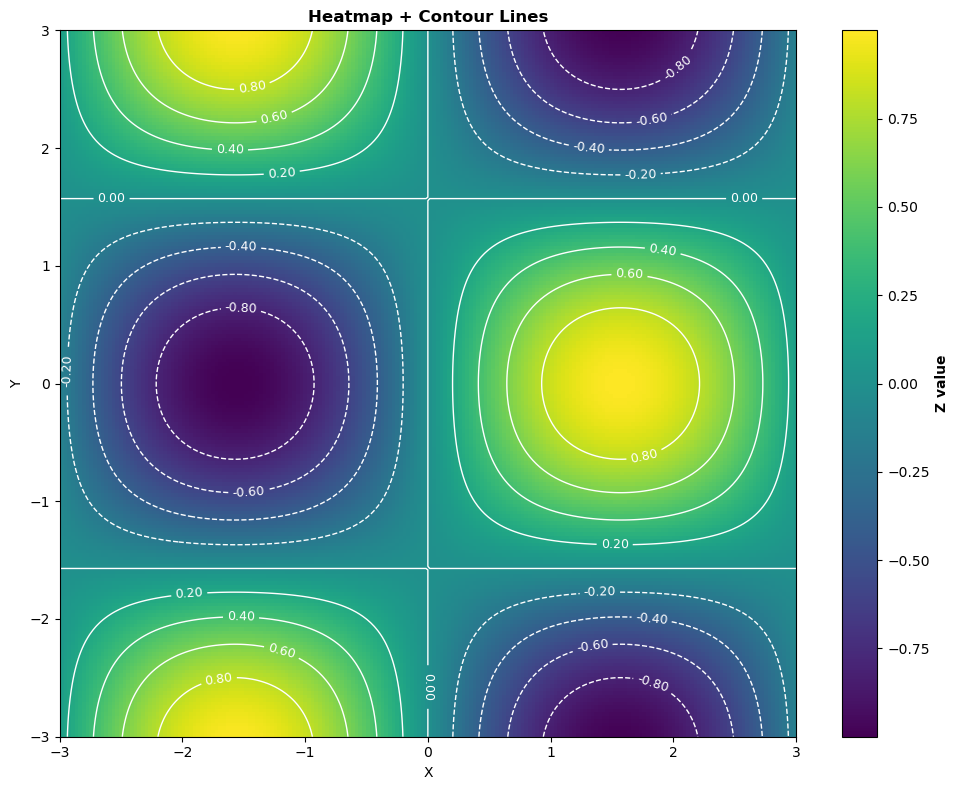

In [3]:
print('=== HEATMAP + CONTOUR OVERLAY ===')
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(Z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis', aspect='auto')
cs = ax.contour(X, Y, Z, colors='white', linewidths=1.0, levels=12)
ax.clabel(cs, inline=True, fontsize=9, fmt='%.2f')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Z value', fontweight='bold')
ax.set_title('Heatmap + Contour Lines', fontweight='bold')
ax.set_xlabel('X'); ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

## 3. Diverging Colormaps and Centering

If values have meaningful sign (negative/positive), use a diverging colormap and symmetric limits.

```python
v = np.max(np.abs(Z))
cf = ax.contourf(X, Y, Z, levels=21, cmap='RdBu_r', vmin=-v, vmax=v)
plt.colorbar(cf, ax=ax)
```


=== DIVERGING CONTOURF (CENTERED AT 0) ===


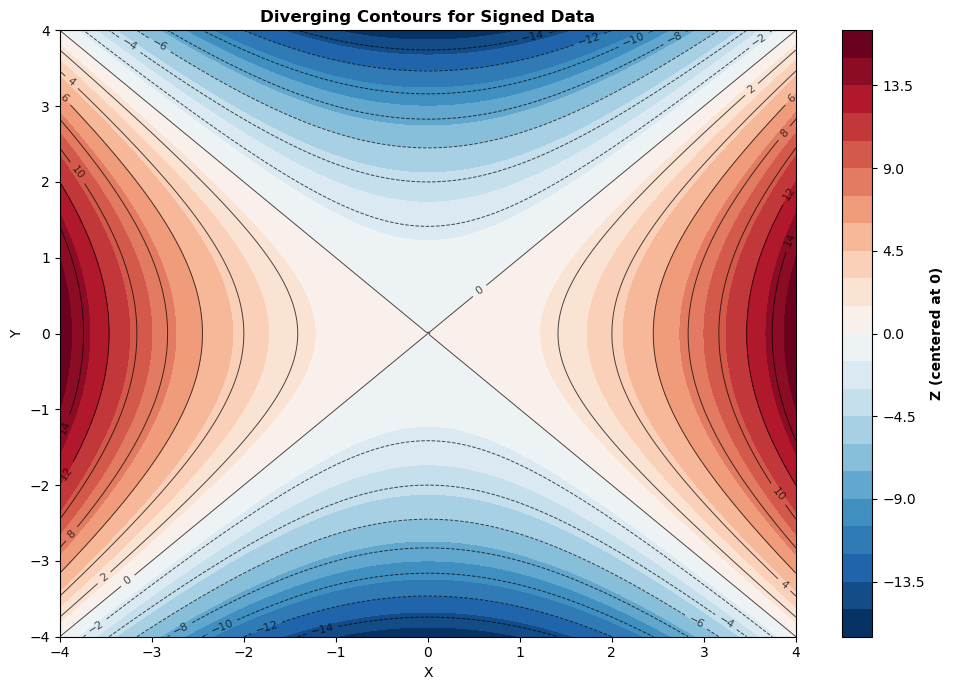

In [4]:
print('=== DIVERGING CONTOURF (CENTERED AT 0) ===')
x = np.linspace(-4, 4, 250)
y = np.linspace(-4, 4, 250)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2  # saddle: positive and negative regions
v = np.max(np.abs(Z))

fig, ax = plt.subplots(figsize=(10, 7))
cf = ax.contourf(X, Y, Z, levels=25, cmap='RdBu_r', vmin=-v, vmax=v)
cs = ax.contour(X, Y, Z, levels=15, colors='k', linewidths=0.7, alpha=0.7)
ax.clabel(cs, inline=True, fontsize=8)
cbar = plt.colorbar(cf, ax=ax)
cbar.set_label('Z (centered at 0)', fontweight='bold')
ax.set_title('Diverging Contours for Signed Data', fontweight='bold')
ax.set_xlabel('X'); ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

## 4. Irregular Data: Triangulation (tricontour)

When (x, y) points are not on a regular grid, use `tricontour` / `tricontourf`.

```python
ax.tricontourf(x, y, z, levels=20, cmap='viridis')
ax.tricontour(x, y, z, levels=10, colors='k')
```


=== TRICONTOURF (IRREGULAR POINTS) ===


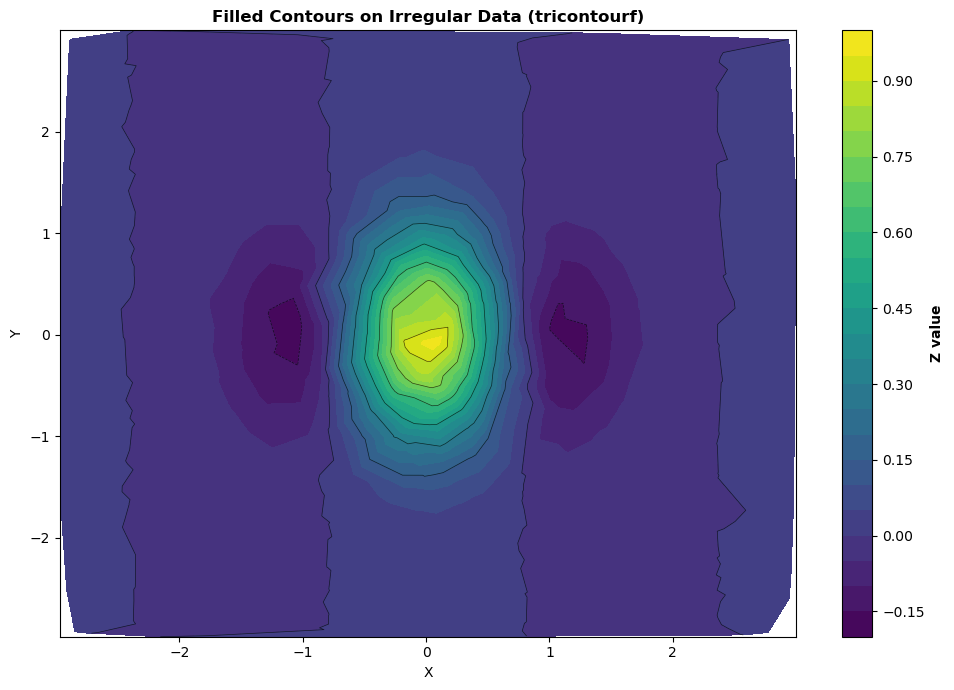

In [5]:
print('=== TRICONTOURF (IRREGULAR POINTS) ===')
n = 800
x = np.random.uniform(-3, 3, n)
y = np.random.uniform(-3, 3, n)
z = np.exp(-(x**2 + y**2)) * np.cos(2*x)

fig, ax = plt.subplots(figsize=(10, 7))
cf = ax.tricontourf(x, y, z, levels=25, cmap='viridis')
cs = ax.tricontour(x, y, z, levels=10, colors='k', linewidths=0.5, alpha=0.7)
ax.set_title('Filled Contours on Irregular Data (tricontourf)', fontweight='bold')
ax.set_xlabel('X'); ax.set_ylabel('Y')
cbar = plt.colorbar(cf, ax=ax)
cbar.set_label('Z value', fontweight='bold')
plt.tight_layout()
plt.show()

## Practice Exercises

### Beginner
1. Create contour plot with 10 levels.
2. Create contourf plot with 20 levels + colorbar.
3. Add contour labels with `clabel`.

### Intermediate
4. Overlay contour lines on top of a heatmap.
5. Use a diverging colormap centered at 0.
6. Compare different level counts (8 vs 30).

### Advanced
7. Use `tricontourf` for irregular (x, y, z) data.
8. Create a 2×2 layout: contour, contourf, heatmap+contour, tricontourf.
9. Add custom level boundaries and a discrete colorbar.

## Quick Reference
```python
cs = ax.contour(X, Y, Z, levels=12, cmap='coolwarm')
ax.clabel(cs, inline=True)

cf = ax.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(cf, ax=ax)

# Irregular points
ax.tricontourf(x, y, z, levels=20, cmap='viridis')
```
